**Import the packages**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
visa_df=pd.read_csv(r"C:\Users\gunda\Documents\Documents\Naresh IT\Data Science\Data files\visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Bi variate analysis**

- Analyse the two variables

- Two categorical columns

- Two numerical columns

- One categorical and one numerical

**Categorical vs Categorical**

In [6]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [8]:
cat=visa_df.select_dtypes(include='object').columns
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [9]:
num_cols=visa_df.select_dtypes(exclude='object').columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Continent-case_status**

In [10]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [11]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**How many Asia people got visa certified**

**How many Asia people got visa denied**

In [19]:
con1=(visa_df['continent']=='Asia')
con2=(visa_df['case_status']=='Certified')
con=con1&con2
len(visa_df[con])
print(f"The numbers of employees got visa certified are: {len(visa_df[con])}")

The numbers of employees got visa certified are: 11012


In [20]:
con3=(visa_df['continent']=='Asia')
con4=(visa_df['case_status']=='Denied')
cond=con3&con4
len(visa_df[cond])
print(f"The numbers of employees got visa denied are: {len(visa_df[cond])}")

The numbers of employees got visa denied are: 5849


In [28]:
keys=visa_df['continent'].unique()
certified_list=[]
denied_list=[]
for i in keys:
    con1=(visa_df['continent']==i)
    con2=(visa_df['case_status']=='Certified')
    con3=(visa_df['case_status']=='Denied')
    cert_con=con1&con2
    denied_con=con1&con3
    certified_list.append(len(visa_df[cert_con]))
    denied_list.append(len(visa_df[denied_con]))

df1=pd.DataFrame(zip(certified_list,denied_list),
             columns=['Certified','Denied'],
             index=keys)
df1

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross tab**

- Cross tab will take two arguments

    - first argument is index
 
    - second argument is column

In [31]:
col1=visa_df['continent']
col2=visa_df['case_status']
result1=pd.crosstab(col1,col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [32]:
col1=visa_df['continent']
col2=visa_df['case_status']
result2=pd.crosstab(col2,col1)
result2

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


<Axes: xlabel='continent'>

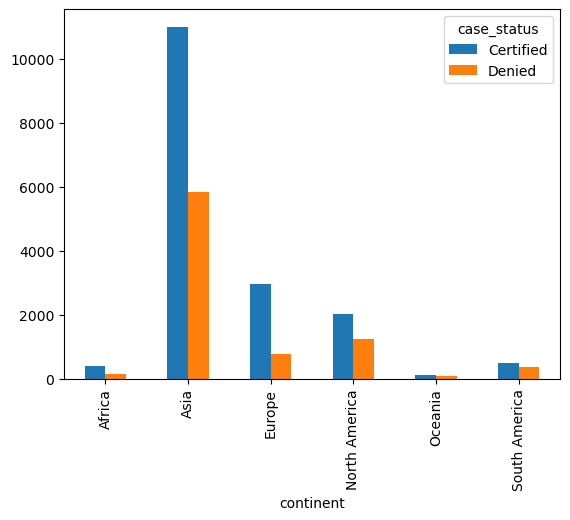

In [33]:
result1.plot(kind='bar')

<Axes: xlabel='case_status'>

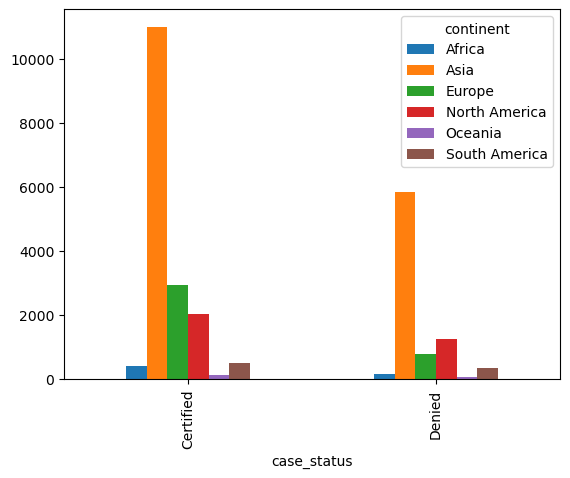

In [34]:
result2.plot(kind='bar')

<Axes: xlabel='case_status'>

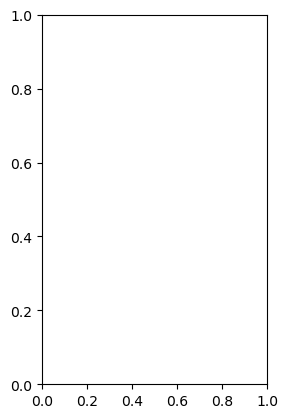

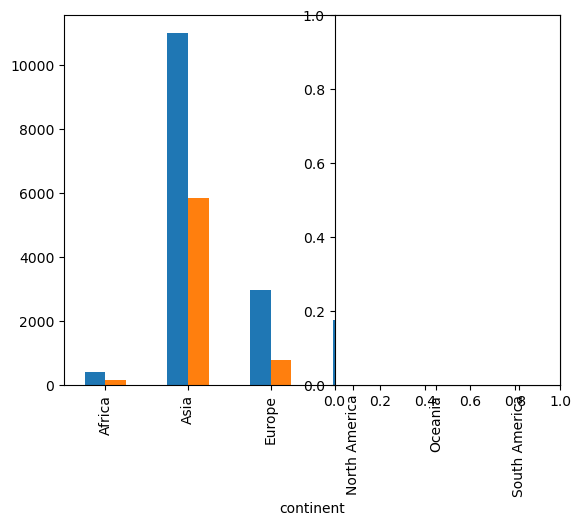

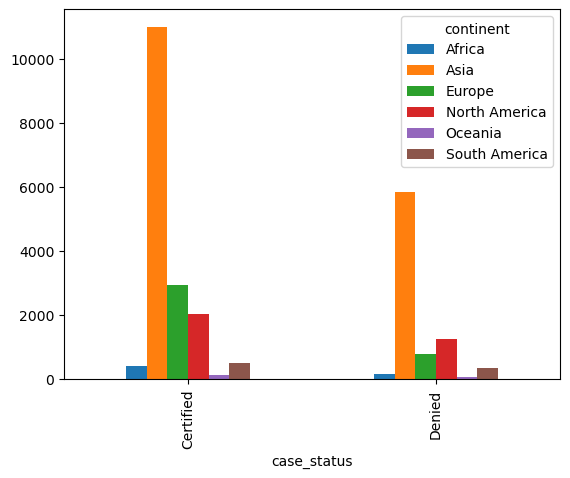

In [35]:
plt.subplot(1,2,1)
result1.plot(kind='bar')
plt.subplot(1,2,2)
result2.plot(kind='bar')

In [36]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
col=[col1,col2]
result3=pd.crosstab(col1,col3)
result3

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [39]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
col=[col1,col3]
result4=pd.crosstab(col1,col2)
result4

education_of_employee,Bachelor's,Doctorate,High School,Master's
continent,,,,
Africa,143,54,66,288
Asia,7168,923,2290,6480
Europe,1299,846,490,1097
North America,1225,258,401,1408
Oceania,66,22,36,68
South America,333,89,137,293


**Numerical-Numerical**

- In order to plot numerical vs numerical, we need to use scatter plots

- Scatter plots give the relation between two numerical columns

- It is under matplotlib

$plt.scatter$

In [ ]:
# y=x graph

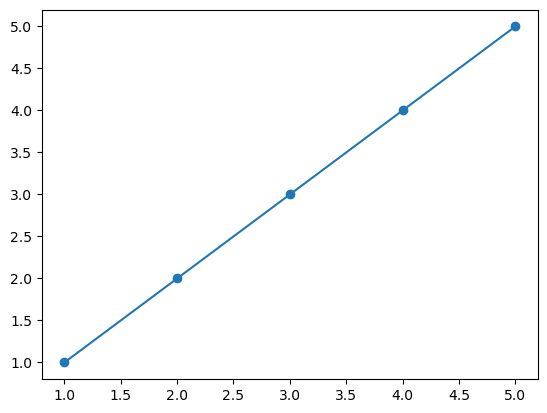

In [45]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
# it is y=x plot
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

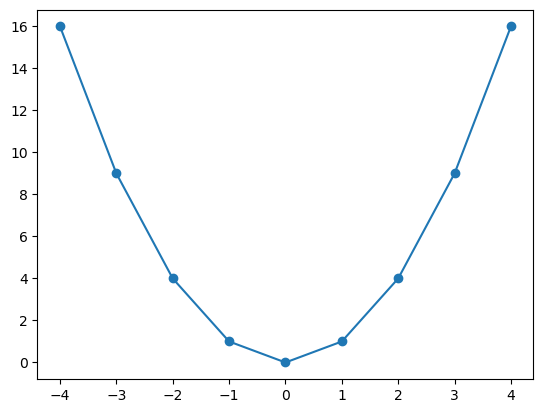

In [47]:
l1=[]
x=[i for i in range(-4,5)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

**Scatter plot-1**

- no_of_employees and yr_of_estab

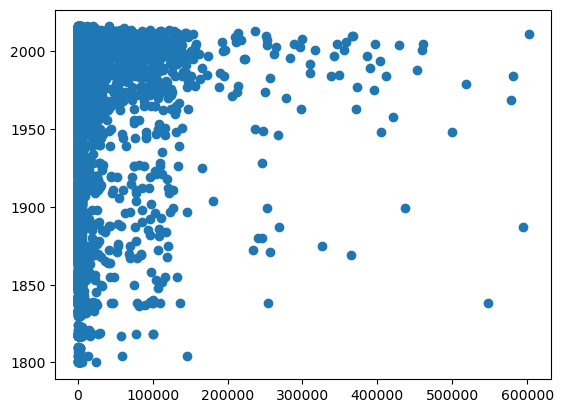

In [49]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)

**Observation- No relation**

     pearson correlation coeff=0

**Scatter plot-2**

- no_of_employees and prevailing_wage

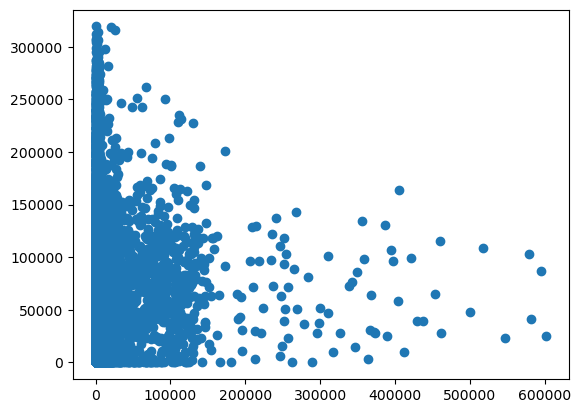

In [51]:
col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)

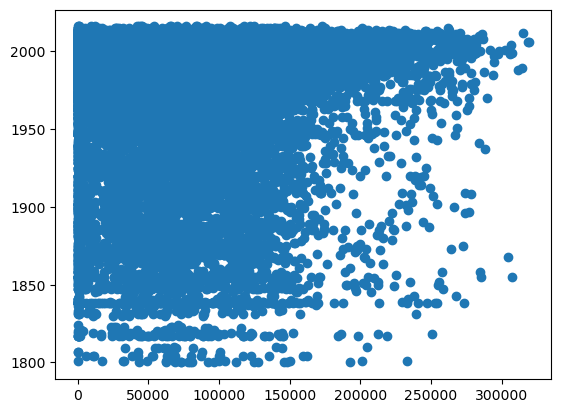

In [52]:
col1=visa_df['prevailing_wage']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)

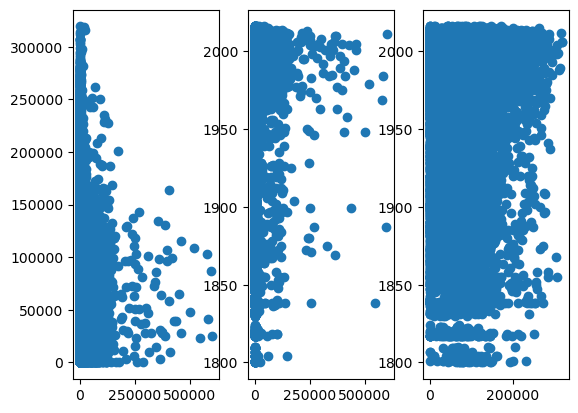

In [57]:
col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.subplot(1,3,1).scatter(col1,col2)

col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.subplot(1,3,2).scatter(col1,col2)

col1=visa_df['prevailing_wage']
col2=visa_df['yr_of_estab']
plt.subplot(1,3,3).scatter(col1,col2)

**Pearson Correlation Coefficient**

<img class="XqHOTb IGEbUc" alt="r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}" src="https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg" role="img" data-csiid="20" data-atf="1">

- Pearson correlation coefficient will give the amount of relation between variables

- It is denoted with r

- r varies from -1 to 1

- For positive relation r varies from 0 to 1

- For negative relation r varies from -1 to 0

- For no relation r approximate to 0

- In python code, we have **corr** function under pandas

    - This will give covariance matrix
 
    - we already discussed covariance matrix in rows and columns type
 
    - In this data we have 3 numerical columns
 
    - so, we will get 3*3= 9 values
 
    - All trace of the matrix represents variance
 
    - Upper traingle and lower triangle represents co-variance

In [55]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Observations**

- The correlation between no_of_employees and yr_of_estab is approximaterly zero

   - Which indicates no relation

- The correlation between no_of_employees and prevailing_wage is approximaterly zero

   - Which indicates no relation

- The correlation between prevailing_wage and yr_of_estab is approximaterly zero

   - Which indicates no relation

** What happen if correlation is high**

- for that we will read wine quality dataset

- will perform the corr


In [3]:
import pandas as pd
wine_data=pd.read_csv(r"C:\Users\gunda\Documents\Documents\Naresh IT\Data Science\Data files\winequality_red.csv")

In [4]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
3196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
wine_data=wine_data.drop_duplicates()
# if you see 
wine_data.iloc[1:,:]
# indexes are not in order
# you need to work on this to make in order

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
7,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
11,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
3189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
3191,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [6]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
len(wine_data.columns)

12

In [8]:
# correlation 12
# 12*12
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


**heat map**

- heat map will provide the matrix representation of correlation value

- heat map represents values in color format

- different different value in different color

- beside matrix it will display color bar

- color bar means like a scale of value with color

- it is under seaborn package

<Axes: >

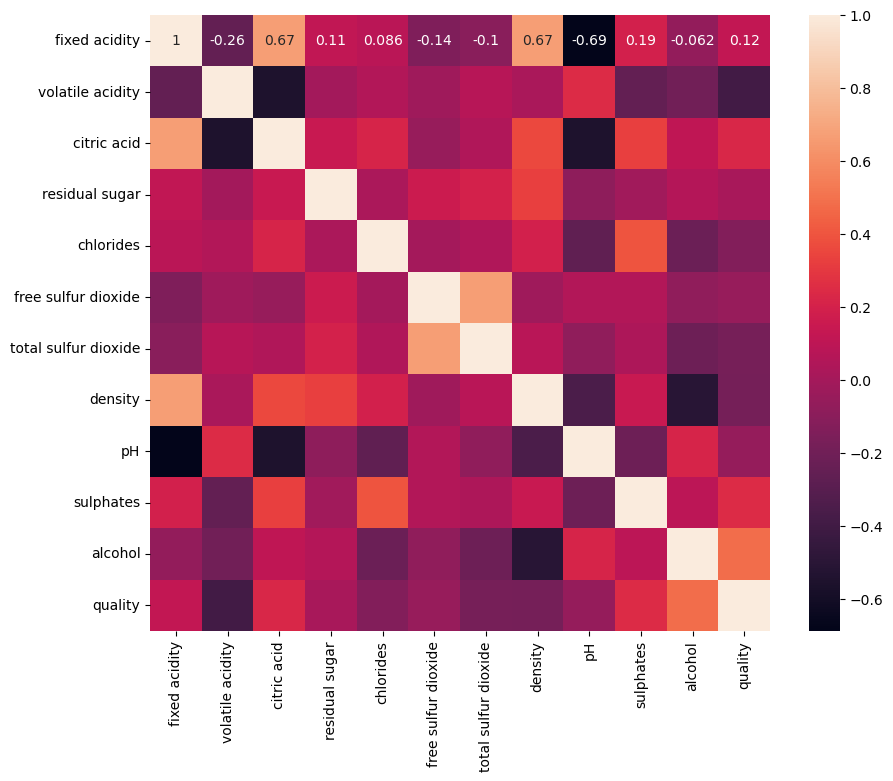

In [16]:
wine_corr=wine_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(wine_corr,
           annot=True)

In [15]:
import seaborn as sns
sns.__version__

'0.12.2'

In [17]:
visa_corr=visa_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(visa_corr,
           annot=True)

NameError: name 'visa_df' is not defined

In [18]:
# Draw the scatter plots for wine data
# which is having highest positive correlation
# which is having highest negative correlation

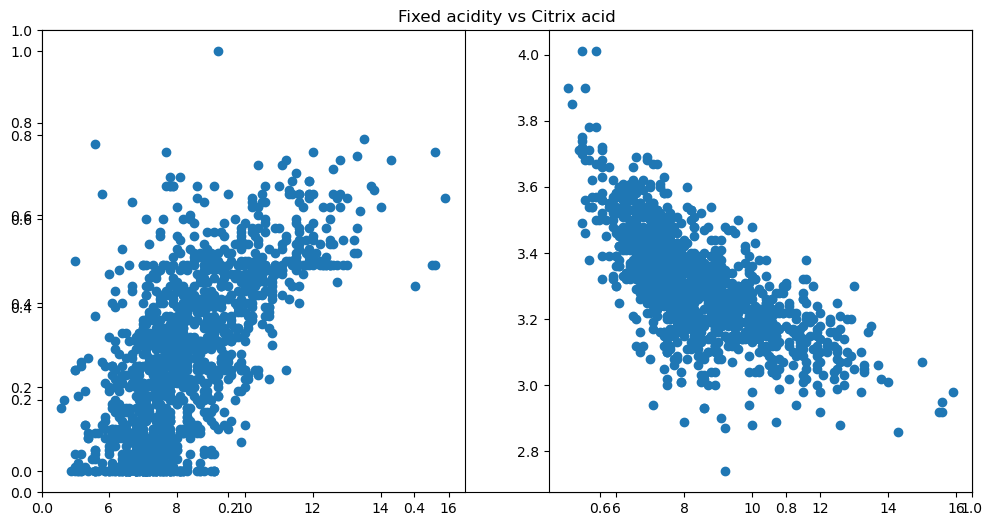

In [34]:
col1=wine_data['fixed acidity']
col2=wine_data['citric acid']
plt.figure(figsize=(12,6))
plt.title("Fixed acidity vs Citrix acid")
plt.subplot(1,2,1).scatter(col1,col2)
col3=wine_data['pH']
plt.subplot(1,2,2).scatter(col1,col3)
plt.show()